In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv('twitter_new.csv', encoding='latin1')
df

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [3]:
df = df.drop(df.columns[[1,2,3,4]], axis=1)


In [4]:
df.columns = ['Target',  'Tweet']
df

,Target,Tweet
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew
...,...,...
1599994,4,Just woke up. Having no school is the best fee...
1599995,4,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,Happy 38th Birthday to my boo of alll time!!! ...


<Axes: xlabel='Target'>

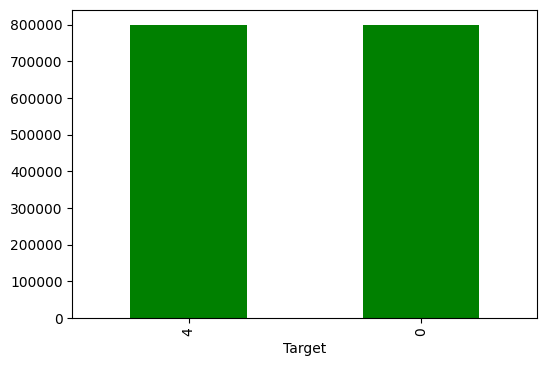

In [5]:
df['Target'].value_counts().plot.bar(color = 'green', figsize = (6, 4))

In [6]:


import nltk
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
#nltk.download('punkt')

#Tokenization


tokenized_tweet = df['Tweet'].apply(lambda x: x.split()) 
df["tokenised tweets"] = tokenized_tweet




In [7]:

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to process each tokenized tweet
def process_tokens(tokens):
    # Remove usernames
    tokens = [token for token in tokens if not token.startswith('@')]
    
    # Remove stopwords
    #tokens = [token for token in tokens if token.lower() not in stop_words]
    
    # Lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return tokens

# Apply the function to each row in the DataFrame
df['Processed_text'] = df['tokenised tweets'].apply(process_tokens)

# Now, 'Processed_text' contains the cleaned and lemmatized tokens


In [8]:
# 'Cleaned tweets' will now contain processed tokens as strings
df['Cleaned tweets'] = df['Processed_text'].apply(lambda tokens: ' '.join(tokens))
df = df.drop(df.columns[[2,3]], axis=1)
df


,Target,Tweet,Cleaned tweets
0,0,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...,I dived many time for the ball. Managed to sav...
2,0,my whole body feels itchy and like its on fire,my whole body feel itchy and like it on fire
3,0,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am ..."
4,0,@Kwesidei not the whole crew,not the whole crew
...,...,...,...
1599994,4,Just woke up. Having no school is the best fee...,Just woke up. Having no school is the best fee...
1599995,4,TheWDB.com - Very cool to hear old Walt interv...,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,Are you ready for your MoJo Makeover? Ask me f...,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,Happy 38th Birthday to my boo of alll time!!! ...,Happy 38th Birthday to my boo of alll time!!! ...


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Tfidf Vectorizer is used

y = df['Target']
x = df['Cleaned tweets']
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)
vect = TfidfVectorizer(min_df=5,ngram_range=(1,2)).fit(X_train)
X_train_vectorized = vect.transform(X_train)
len(vect.get_feature_names_out())

313326

In [28]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression().fit(X_train_vectorized,y_train)
pred = model.predict(vect.transform(X_test))
accuracy_score(y_test,pred)

0.81815

In [34]:
#MULTINOMIAL NAIVE BAYES

from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB(alpha=0.1).fit(X_train_vectorized,y_train)
pred1 = clf.predict(vect.transform(X_test))
accuracy_score(y_test,pred1)

0.798371875

In [29]:
#Linear SVM

from sklearn.svm import LinearSVC
model2 = LinearSVC().fit(X_train_vectorized,y_train)
pred2 = model2.predict(vect.transform(X_test))
accuracy_score(y_test,pred2)

0.812034375

In [30]:
X_test_vectorized = vect.transform(X_test)

In [31]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test_vectorized)

# Generate the classification report for logistic regression
report = classification_report(y_test, y_pred)

print(report)


              precision    recall  f1-score   support

           0       0.83      0.81      0.82    160088
           4       0.81      0.83      0.82    159912

    accuracy                           0.82    320000
   macro avg       0.82      0.82      0.82    320000
weighted avg       0.82      0.82      0.82    320000



In [32]:
y_pred = model2.predict(X_test_vectorized)

# Generate the classification report for linear svm
report1 = classification_report(y_test, y_pred)

print(report1)

              precision    recall  f1-score   support

           0       0.82      0.80      0.81    160088
           4       0.81      0.82      0.81    159912

    accuracy                           0.81    320000
   macro avg       0.81      0.81      0.81    320000
weighted avg       0.81      0.81      0.81    320000



In [35]:
import pickle

#Logistic Regression is used

# Save the model
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the vectorizer
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vect, vectorizer_file)
